In [1]:
#importation des librairies nécessaires
import pandas as pd
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import seaborn as sns
import sklearn as sk
from scipy.stats import chi2_contingency
import langdetect
from langdetect import detect
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp

%matplotlib inline




#import du dataset
df = pd.read_csv(r"C:\Users\sesa638933\Desktop\P2_zeff_jonas\Projet+Python_Dataset_Edstats_csv\cleaned.csv", sep=',')


df.head()

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g
0,3429145,http://world-en.openfoodfacts.org/product/0000...,l.casei,spain,"leche semidesnatada, azucar 6.9% leche desnata...",NaN,1.4,2.7
1,100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,france,eau graines de téguments de moutarde vinaigre ...,NaN,8.2,5.1
2,1199,http://world-en.openfoodfacts.org/product/0000...,solène céréales poulet,france,"antioxydant : érythorbate de sodium, colorant ...",219.0,5.9,9.7
3,1663,http://world-en.openfoodfacts.org/product/0000...,crème dessert chocolat,france,"lait entier, sucre, amidon de maïs, cacao, aga...",0.0,0.0,0.0
4,2264,http://world-en.openfoodfacts.org/product/0000...,baguette poitevin,france,"baguette poite vin pain baguette 50,6%: farine...",207.0,6.7,8.9


**Filtrer les variables**



In [2]:
#Eliminer les lignes qui ne sont pas parmis celles qui nous intéresse
df.drop(df.columns.difference(['code','url','product_name','countries_en','ingredients_text','proteins_100g','energy-kcal_100g','fat_100g']), 1, inplace=True)

In [3]:
#vérifier
df.head()

,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g
0,3429145,http://world-en.openfoodfacts.org/product/0000...,l.casei,spain,"leche semidesnatada, azucar 6.9% leche desnata...",NaN,1.4,2.7
1,100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,france,eau graines de téguments de moutarde vinaigre ...,NaN,8.2,5.1
2,1199,http://world-en.openfoodfacts.org/product/0000...,solène céréales poulet,france,"antioxydant : érythorbate de sodium, colorant ...",219.0,5.9,9.7
3,1663,http://world-en.openfoodfacts.org/product/0000...,crème dessert chocolat,france,"lait entier, sucre, amidon de maïs, cacao, aga...",0.0,0.0,0.0
4,2264,http://world-en.openfoodfacts.org/product/0000...,baguette poitevin,france,"baguette poite vin pain baguette 50,6%: farine...",207.0,6.7,8.9


In [4]:
#Eliminer les valeurs na pour les colonnes en question
df = df[df['proteins_100g'].notna()]

In [5]:
df = df[df['countries_en'].notna()]

In [6]:
df = df[df['fat_100g'].notna()]

In [7]:
df = df[df['ingredients_text'].notna()]

In [8]:
#vérifier
df.head()

,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g
0,3429145,http://world-en.openfoodfacts.org/product/0000...,l.casei,spain,"leche semidesnatada, azucar 6.9% leche desnata...",NaN,1.4,2.7
1,100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,france,eau graines de téguments de moutarde vinaigre ...,NaN,8.2,5.1
2,1199,http://world-en.openfoodfacts.org/product/0000...,solène céréales poulet,france,"antioxydant : érythorbate de sodium, colorant ...",219.0,5.9,9.7
3,1663,http://world-en.openfoodfacts.org/product/0000...,crème dessert chocolat,france,"lait entier, sucre, amidon de maïs, cacao, aga...",0.0,0.0,0.0
4,2264,http://world-en.openfoodfacts.org/product/0000...,baguette poitevin,france,"baguette poite vin pain baguette 50,6%: farine...",207.0,6.7,8.9


In [9]:
#Eliminer toutes les lignes pour lesquelles la concentration en protéines est inférieure à 20g pour 100g de produit
df_prot = df[df.proteins_100g >= 20] 

In [10]:
#Changer les valeurs en minuscules
df_prot = df_prot.applymap(lambda s: s.lower() if type(s) == str else s)
#vérifier
df_prot.head()

,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g
17,16612,http://world-en.openfoodfacts.org/product/0000...,organic adzuki beans,united states,organic adzuki beans,333.0,1.04,22.92
21,17497,http://world-en.openfoodfacts.org/product/0000...,organic spicy punks,united states,"organic dry roasted pumpkin seeds, tamari (soy...",606.0,48.48,30.30
35,18418,http://world-en.openfoodfacts.org/product/0000...,wasabi tamari almonds,united states,"almonds, wasabi spice (salt, rice flour, evapo...",533.0,46.67,20.00
52,30557,http://world-en.openfoodfacts.org/product/0000...,organic green split peas,united states,organic green split peas,378.0,1.11,28.89
53,30595,http://world-en.openfoodfacts.org/product/0000...,organic grey-green lentils,united states,organic grey-green lentils,378.0,1.11,28.89


In [11]:
#Longueur du df
len(df_prot)

50380

In [12]:
#Creation de la colonne pour conserver uniquement les produits dont les ingredients sont écrits en français
df_prot['fr']=0

In [13]:
#definir une méthode pour outre passer les ingredients avec des elements non assimilables à une langue
def fr_language_detector (ingredients):
    try:
        return detect(ingredients)
    except Exception as e:
        print(e)
        print(ingredients)
        return 'lenguagenotfound'
        

In [14]:

#detection de la langue des ingredients

df_prot["fr"]=df_prot["ingredients_text"].apply(fr_language_detector)

No features in text.
100%
No features in text.
🤬
No features in text.
/
No features in text.
(
No features in text.
*
No features in text.
•


In [15]:
#nombre d'ingredients en fonction de langue
df_prot['fr'].value_counts()

en                  20253
fr                  17547
de                   2758
it                   1990
ro                   1953
et                   1114
ca                    773
nl                    663
es                    611
sv                    542
no                    331
tl                    258
pt                    233
af                    233
da                    216
fi                    183
pl                    102
id                     90
ru                     60
lt                     52
sl                     47
lv                     42
cy                     42
sq                     41
tr                     30
bg                     30
hu                     29
hr                     27
sk                     25
so                     24
cs                     17
mk                     15
sw                     14
el                      9
uk                      7
lenguagenotfound        6
vi                      5
ja                      3
ar          

In [16]:
#conserver uniquement les ingredients ecrits en français
df_prot = df_prot[df_prot["fr"].str.contains("fr")==True]

In [17]:
df_prot['fr']

143       fr
236       fr
239       fr
284       fr
285       fr
          ..
506390    fr
506392    fr
506395    fr
506602    fr
506603    fr
Name: fr, Length: 17547, dtype: object

In [18]:
#longueur du df
len(df_prot)

17547

In [19]:
#Eliminer les lignes dont le produit contient un des ingrédients de type viande
df_prot_veg = df_prot[~df_prot.ingredients_text.str.contains('viande|boeuf|poulet|cochon|lapin|porc|cheval|dinde|sanglier|veau|chevreuille|mouton|lievre|ane|vache|toro|canard|pintade|coq|caille|faisan|chevreau|agneau|brebis|chevre|meat|beef|chicken|pig|rabbit|pork|horse|turkey|boar|cal|calf|deer|sheep|pitch|cow|toro|duck|pintade|guinea|fowl|cowl|pheasant|kate|lamb|sheep|goat|mięso|wołowe|kurczak|świnia|królik|wieprzowina|koń|indyk|byk|koza|owca|kozioł|świnia|krowa|kaczka|kogut|przepiórka|ptactwo|owca|koza|karne|baka|manok|baboy|kuneho|baboy|kabayo|pabo|ligaw|guya|roebuck|tupa|liyebre|asno|baka|toro|pato|guinea|fowl|tandang|pugo|pheasant|bata|tupa|ewe|kambing|kød|oksekød|kylling|svin|kanin|kanin|svin|hest|kalkun|tjur|får|ged|geder|geder|geder|ko|toro|and|nitte|næse|carne|de vită|de porc|de iepure|de porc|de cal|de curcan|de taur|de taur|de capră|de oaie|de capră|de porc|de vacă|de vacă|de porc|de rață|de porc|de prepeliță|de pasăre|de oaie|de țap|Carne|Polla|Suolo|Consiglio|Cavallo|Condino|Condino|Condino|Capretto|Capretto|Montagno|Montagno|Capretto|Capretto|Capretto|Capretto|Capretto|Capretto|Capretto|Agnello|govedina|chil|cochon|lapin|porc|cheval|dinde|sanglier|veau|chevreuille|mouton|lavre|avre|veau|chevreuille|mouton|lavre|Hühner|Schwein|Schwein|Schwein|Schwein|Truthahn|Schwein|Truthahn|Schwein|Schwein|Helfe|Kuh|Toros|Ente|Hahn|Fasan|Lamm|Ziege|Schwein|liha|veiseliha|kana|siga|küülik|siga|hobune|kalkun|bull|kits|lammas|kits|siga|lehm|tooro|pintade|kukk|vutt|lind|lammas|kits|carne|bovuey|pollo|cochón|conejo|puerco|caballo|nuevo|cabra|cabra|oveja|liebre|liebre|vaca|toro|pato|pinta|coq|ca|caballo|caballo|cordero|oveja|cabra')]



In [20]:
#vérifier nombre de lignes après élimination
len(df_prot_veg.index)

5033

In [21]:
#Eliminer lignes dont le produit ne se trouve pas en vente en France
df_prot_veg_fr = df_prot_veg.loc[df_prot['countries_en']=='france']
dff=df_prot_veg_fr
#vérifier
dff

,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g,fr
15828,14113912112,http://world-en.openfoodfacts.org/product/0014...,pistachios salt & pepper,france,"pistaches 96%, sel 2%, poivre, sucre, poudre d...",NaN,46.0,21.4,fr
15829,14113912341,http://world-en.openfoodfacts.org/product/0014...,pistaches au piment doux,france,"pistaches (95%), sucre (2.5%). sel (2.4%), pou...",577.0,45.2,20.0,fr
15831,14113912860,http://world-en.openfoodfacts.org/product/0014...,pistaches xxl poivre & sel,france,"_pistaches_ (96%), sel (2,5%), poivre (0,5%), ...",NaN,46.0,21.4,fr
15832,14113912877,http://world-en.openfoodfacts.org/product/0014...,wonderful pistachios sweet chili,france,"_pistaches_, sucre (2.5%). sel (2.4%). poudre ...",577.0,45.2,20.0,fr
24502,199841,http://world-en.openfoodfacts.org/product/0019...,red leicester,france,fromage red leicester (lait)· colorant rocou.,390.0,32.0,25.5,fr
...,...,...,...,...,...,...,...,...,...
503136,4800092330131,http://world-en.openfoodfacts.org/product/4800...,ding dong mixed nuts,france,arachides pois verts maïs fèves sel iodé sucre...,533.0,30.0,20.0,fr
503771,4901280900089,http://world-en.openfoodfacts.org/product/4901...,thé au jasmin,france,thé vert & fleurs de jasmin,359.0,2.0,28.2,fr
503954,4902401217437,http://world-en.openfoodfacts.org/product/4902...,hanamaruki instant aka miso soup - soya bean p...,france,soupe miso rouge instannée kd (aka ml soshiru)...,349.0,9.5,22.0,fr
505943,5000171054852,http://world-en.openfoodfacts.org/product/5000...,infusions tuna,france,"bonite à ventre rayé (skipjack tuna) (80%), hu...",202.0,11.5,24.2,fr


In [22]:
#Quelques essais pour rendre compte du nombre de produits contenant différents ingrédients connus communément
len(dff)

4135

In [23]:
dffsoja = dff[dff.ingredients_text.str.contains("soja")]

In [24]:
len(dffsoja)

184

In [25]:
dfflentille = dff[dff.ingredients_text.str.contains("lentille")]

In [26]:
len(dfflentille)

214

In [27]:
dffharicot = dff[dff.ingredients_text.str.contains("haricot")]

In [28]:
len(dffharicot)

23

In [29]:
dfflait = dff[dff.ingredients_text.str.contains("lait")]

In [30]:
len(dfflait)

1294

In [31]:
#lister quelques ingrédients
n = 10
dff['ingredients_text'].value_counts()[:n].index.tolist()

['lait cru, ferments lactiques (lait), sel, présure',
 'lentilles vertes',
 'lentilles vertes.',
 'lait cru, sel, ferments lactiques, présure.',
 'lentilles corail',
 'lait cru, sel, ferments lactiques, présure',
 'lait pasteurisé, sel, ferments lactiques, coagulant.',
 'graines de courge',
 'graines de tournesol',
 'lait, sel, présure.']

In [32]:
#Catégriser la concentration en protéines
rating_p = []
for row in dff['proteins_100g']:
        if row <= 25 :    
            rating_p.append('low')
        elif 70 >= row > 25:
            rating_p.append('middle')
        else:           
            rating_p.append('high')
dff['rating_p'] = rating_p
dff

<ipython-input-32-394b565e1f3b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['rating_p'] = rating_p


,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g,fr,rating_p
15828,14113912112,http://world-en.openfoodfacts.org/product/0014...,pistachios salt & pepper,france,"pistaches 96%, sel 2%, poivre, sucre, poudre d...",NaN,46.0,21.4,fr,low
15829,14113912341,http://world-en.openfoodfacts.org/product/0014...,pistaches au piment doux,france,"pistaches (95%), sucre (2.5%). sel (2.4%), pou...",577.0,45.2,20.0,fr,low
15831,14113912860,http://world-en.openfoodfacts.org/product/0014...,pistaches xxl poivre & sel,france,"_pistaches_ (96%), sel (2,5%), poivre (0,5%), ...",NaN,46.0,21.4,fr,low
15832,14113912877,http://world-en.openfoodfacts.org/product/0014...,wonderful pistachios sweet chili,france,"_pistaches_, sucre (2.5%). sel (2.4%). poudre ...",577.0,45.2,20.0,fr,low
24502,199841,http://world-en.openfoodfacts.org/product/0019...,red leicester,france,fromage red leicester (lait)· colorant rocou.,390.0,32.0,25.5,fr,middle
...,...,...,...,...,...,...,...,...,...,...
503136,4800092330131,http://world-en.openfoodfacts.org/product/4800...,ding dong mixed nuts,france,arachides pois verts maïs fèves sel iodé sucre...,533.0,30.0,20.0,fr,low
503771,4901280900089,http://world-en.openfoodfacts.org/product/4901...,thé au jasmin,france,thé vert & fleurs de jasmin,359.0,2.0,28.2,fr,middle
503954,4902401217437,http://world-en.openfoodfacts.org/product/4902...,hanamaruki instant aka miso soup - soya bean p...,france,soupe miso rouge instannée kd (aka ml soshiru)...,349.0,9.5,22.0,fr,low
505943,5000171054852,http://world-en.openfoodfacts.org/product/5000...,infusions tuna,france,"bonite à ventre rayé (skipjack tuna) (80%), hu...",202.0,11.5,24.2,fr,low


In [33]:
#Calcul de la moyenne, médiane, permier et troisième quartile, variance, ecart-type et espace interquatile pour les concentrations en proteines
m=np.mean(dff['proteins_100g'])
m

26.026201115086515

In [34]:
me=np.median(dff['proteins_100g'])
me

23.8

In [35]:
q1=np.percentile(dff['proteins_100g'], 25)
q1

21.5

In [36]:
q3=np.percentile(dff['proteins_100g'], 75)
q3

27.0

In [37]:
v=np.var(dff['proteins_100g'])
round(v, 2)

84.77

In [38]:
e=np.std(dff['proteins_100g'])
round(e, 2)

9.21

In [39]:
eq = q3 - q1
eq

5.5

{'whiskers': [<matplotlib.lines.Line2D at 0x2126dddb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2126dddbfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2126dddb580>],
 'medians': [<matplotlib.lines.Line2D at 0x2126ddea6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2126ddeaa00>],
 'means': []}

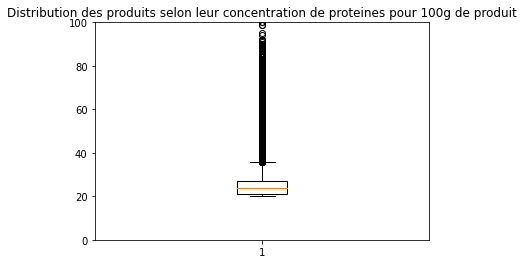

In [40]:
#boxplot des concentrations en proteines
fig1, ax1 = plt.subplots()
ax1.set_ylim(0, 100)
ax1.set_title('Distribution des produits selon leur concentration de proteines pour 100g de produit')
ax1.boxplot(df_prot['proteins_100g'])

{'whiskers': [<matplotlib.lines.Line2D at 0x212701eb520>,
 'caps': [<matplotlib.lines.Line2D at 0x212701ebbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212701eb1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x212701f32e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212701f3640>],
 'means': []}

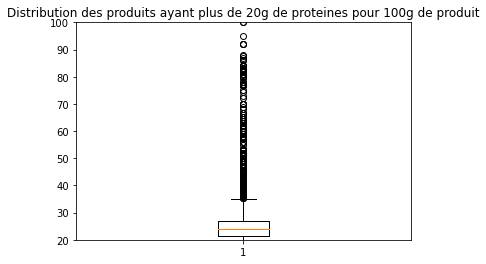

In [41]:
#boxplot des concentration en proteines avec concentration superieure ou égale à 20 g pour 100g de produit
fig1, ax1 = plt.subplots()
ax1.set_ylim(20,100)
ax1.set_title('Distribution des produits ayant plus de 20g de proteines pour 100g de produit')
ax1.boxplot(dff['proteins_100g'])

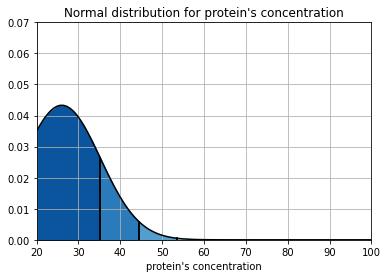

In [42]:
#distribution normale des concentration en proteines

x_min = 20
x_max = 100

mean = m 
std = e

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.07)

plt.title('Normal distribution by protein concentration',fontsize=10)

plt.xlabel('protein\'s concentration')
plt.title('Normal distribution for protein\'s concentration')
plt.savefig("normal_distribution_2.png")
plt.show()

<AxesSubplot:>

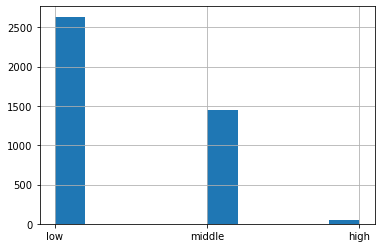

In [43]:
#histogramme de la distribution des concentration en proteines
dff['rating_p'].hist(ylabelsize=10)

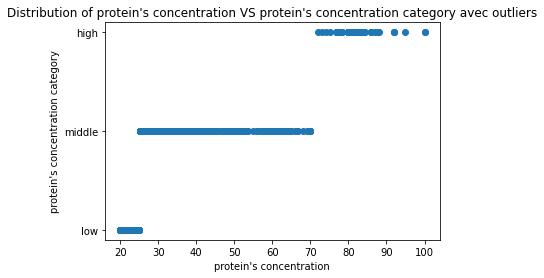

In [44]:
#nuage de points de la distribution des concentrations de proteines 
plt.xlabel('protein\'s concentration')
plt.ylabel('protein\'s concentration category')
plt.title('Distribution of protein\'s concentration VS protein\'s concentration category avec outliers')
plt.scatter(dff['proteins_100g'], dff['rating_p'])

In [45]:
#Elimination des outliers
dff = dff[dff.proteins_100g < 100]

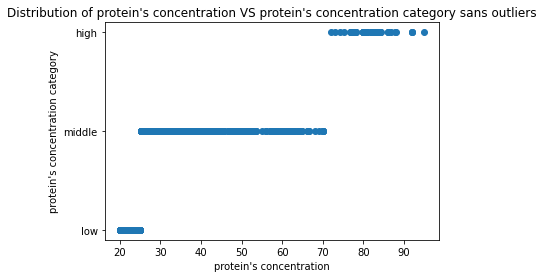

In [46]:
#nuage de point après elimination des outliers
plt.xlabel('protein\'s concentration')
plt.ylabel('protein\'s concentration category')
plt.title('Distribution of protein\'s concentration VS protein\'s concentration category sans outliers')
plt.scatter(dff['proteins_100g'], dff['rating_p'])

In [47]:
#Calcul de la moyenne, médiane, permier et troisième quartile, variance, ecart-type et espace interquatile pour les concentrations en proteines après avoir eliminer les outliers

mp=np.mean(dff['proteins_100g'])
m

26.026201115086515

In [48]:
mep=np.median(dff['proteins_100g'])
me

23.8

In [49]:
q1p=np.percentile(dff['proteins_100g'], 25)
q1

21.5

In [50]:
q3p=np.percentile(dff['proteins_100g'], 75)
q3

27.0

In [51]:
vp=np.var(dff['proteins_100g'])
round(v, 2)

84.77

In [52]:
ep=np.std(dff['proteins_100g'])
round(e, 2)

9.21

In [53]:
eqp = q3 - q1
eq

5.5

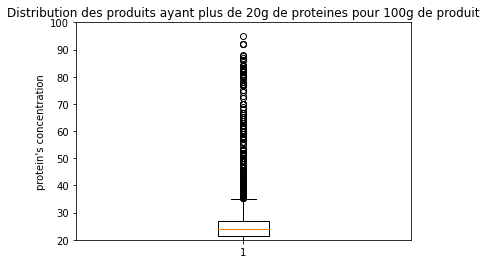

In [54]:
#boxplot de la distribution des concentrations en proteines apres avoir eliminer les outliers
fig1, ax1 = plt.subplots()
ax1.set_ylim(20,100)
ax1.set_ylabel('protein\'s concentration')
ax1.set_title('Distribution des produits ayant plus de 20g de proteines pour 100g de produit');
ax1.boxplot(dff['proteins_100g']);

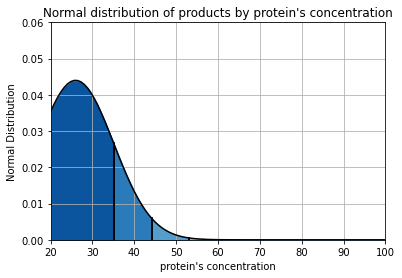

In [55]:
#distribution normale des concentrations en proteines apres avoir eliminer les outliers
x_min = 20
x_max = 100

mean = mp 
std = ep

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.06)

plt.title('Normal distribution of products by protein\'s concentration',fontsize=12)

plt.xlabel('protein\'s concentration')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution_2.png")
plt.show()

<AxesSubplot:>

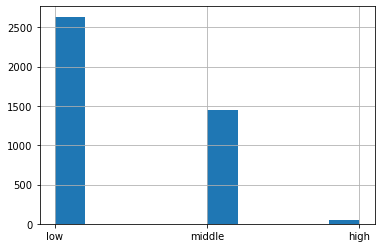

In [56]:
#histogramme de la distribution des cocnentrations en proteines apres avoir eliminer les outliers
dff['rating_p'].hist(ylabelsize=10)

In [57]:
#Calculs de la part en poucentage des differentes categories de concentration en proteines
(dff['rating_p'].value_counts()/dff['rating_p'].count())*100

low       63.755142
middle    35.035083
high       1.209775
Name: rating_p, dtype: float64

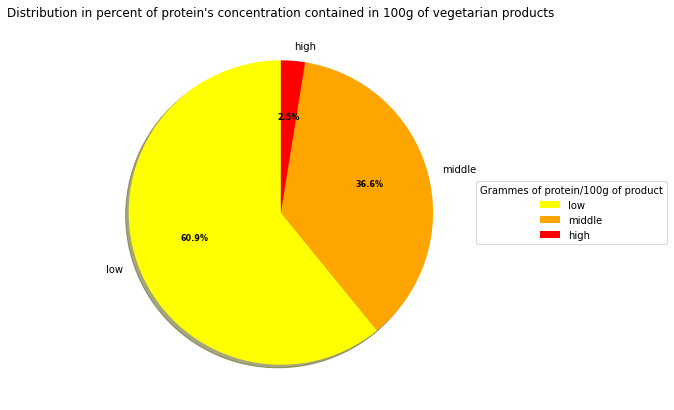

In [58]:
#pie chart de la distribution des categories de concentration de proteines
y = np.array([60.882855, 36.572867, 2.544278])
mylabels = ["low", "middle", "high"]
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
fig, ax = plt.subplots(figsize =(7, 7))
wedges, texts, autotexts = ax.pie(y, 
                                  autopct = lambda pct: func(pct, y), 
                                  labels = mylabels,
                                  shadow = True,
                                  colors = ['yellow','orange','red'],
                                  startangle = 90,
                                  textprops = dict(color ="black"))
ax.legend(wedges, mylabels,
          title ="Grammes of protein/100g of product",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Distribution in percent of protein's concentration contained in 100g of vegetarian products")
plt.show() 

In [59]:
#categorisation des concentrations en matiere grasse
rating_f = []
for row in dff['fat_100g']:
        if row <= 5 :    
            rating_f.append('low')
        elif 20 >= row > 5:
            rating_f.append('middle')
        else:           
            rating_f.append('high')
dff['rating_f'] = rating_f
#verifier
dff

<ipython-input-59-c372e14a3bed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['rating_f'] = rating_f


,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g,fr,rating_p,rating_f
15828,14113912112,http://world-en.openfoodfacts.org/product/0014...,pistachios salt & pepper,france,"pistaches 96%, sel 2%, poivre, sucre, poudre d...",NaN,46.0,21.4,fr,low,high
15829,14113912341,http://world-en.openfoodfacts.org/product/0014...,pistaches au piment doux,france,"pistaches (95%), sucre (2.5%). sel (2.4%), pou...",577.0,45.2,20.0,fr,low,high
15831,14113912860,http://world-en.openfoodfacts.org/product/0014...,pistaches xxl poivre & sel,france,"_pistaches_ (96%), sel (2,5%), poivre (0,5%), ...",NaN,46.0,21.4,fr,low,high
15832,14113912877,http://world-en.openfoodfacts.org/product/0014...,wonderful pistachios sweet chili,france,"_pistaches_, sucre (2.5%). sel (2.4%). poudre ...",577.0,45.2,20.0,fr,low,high
24502,199841,http://world-en.openfoodfacts.org/product/0019...,red leicester,france,fromage red leicester (lait)· colorant rocou.,390.0,32.0,25.5,fr,middle,high
...,...,...,...,...,...,...,...,...,...,...,...
503136,4800092330131,http://world-en.openfoodfacts.org/product/4800...,ding dong mixed nuts,france,arachides pois verts maïs fèves sel iodé sucre...,533.0,30.0,20.0,fr,low,high
503771,4901280900089,http://world-en.openfoodfacts.org/product/4901...,thé au jasmin,france,thé vert & fleurs de jasmin,359.0,2.0,28.2,fr,middle,low
503954,4902401217437,http://world-en.openfoodfacts.org/product/4902...,hanamaruki instant aka miso soup - soya bean p...,france,soupe miso rouge instannée kd (aka ml soshiru)...,349.0,9.5,22.0,fr,low,middle
505943,5000171054852,http://world-en.openfoodfacts.org/product/5000...,infusions tuna,france,"bonite à ventre rayé (skipjack tuna) (80%), hu...",202.0,11.5,24.2,fr,low,middle


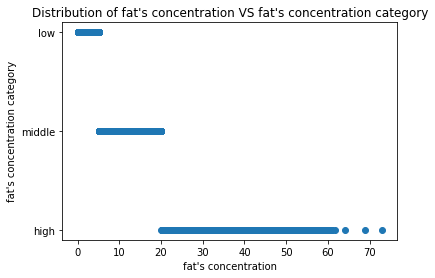

In [60]:
#nuage de points de la distribution des concentrations en matiere grasse
plt.ylabel('fat\'s concentration category')
plt.xlabel('fat\'s concentration')
plt.title('Distribution of fat\'s concentration VS fat\'s concentration category')
plt.scatter(dff['fat_100g'], dff['rating_f'])

In [61]:
#Calcul de la moyenne, médiane, permier et troisième quartile, variance, ecart-type et espace interquatile pour les concentrations en matiere grasse

mf=np.mean(dff['fat_100g'])
mf

18.054160510797217

In [62]:
mef=np.median(dff['fat_100g'])
mef

15.0

In [63]:
q1f=np.percentile(dff['fat_100g'], 25)
q1f

6.2

In [64]:
q3f=np.percentile(dff['fat_100g'], 75)
q3f

29.0

In [65]:
vf=np.var(dff['fat_100g'])
round(vf, 2)

194.18

In [66]:
ef=np.std(dff['fat_100g'])
round(ef, 2)

13.93

In [67]:
eqf = q3f - q1f
eqf

22.8

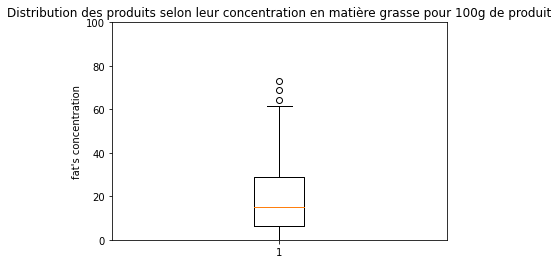

In [68]:
#boxplot de la distribution des concentrations en matiere grasse
fig1, ax1 = plt.subplots()
ax1.set_ylim(0,100)
ax1.set_ylabel('fat\'s concentration')
ax1.set_title('Distribution des produits selon leur concentration en matière grasse pour 100g de produit');
ax1.boxplot(dff['fat_100g']);

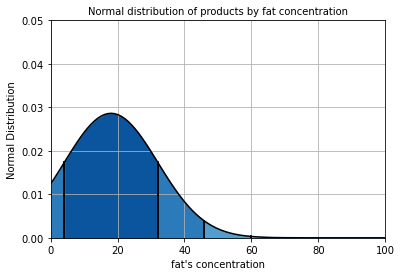

In [69]:
#distribution normale des concentrations en matiere grasse
x_min = 0
x_max = 100

mean = mf 
std = ef

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.05)

plt.title('Normal distribution of products by fat concentration',fontsize=10)

plt.xlabel('fat\'s concentration')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution_2.png")
plt.show()

<AxesSubplot:>

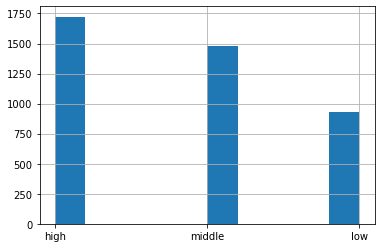

In [70]:
#histogramme de la distribution des concentrations en matiere grasse
dff['rating_f'].hist(ylabelsize=10)

In [71]:
#part en pourcentage de chaque categorie de concentration de matiere grasse
(dff['rating_f'].value_counts()/dff['rating_f'].count())*100

high      41.688846
middle    35.809339
low       22.501815
Name: rating_f, dtype: float64

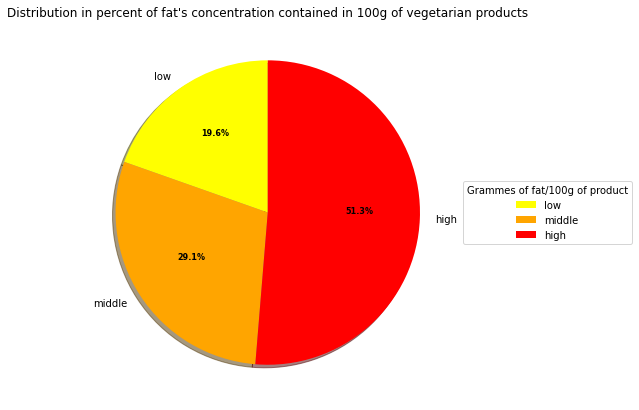

In [72]:
#pie chart de la répartition en pourcentage des categories de concentration de matiere grasse
y = np.array([19.597386, 29.099377, 51.303237])
mylabels = ["low", "middle", "high"]
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y, 
                                  autopct = lambda pct: func(pct, y), 
                                  labels = mylabels,
                                  shadow = True,
                                  colors = ['yellow','orange','red'],
                                  startangle = 90,
                                  textprops = dict(color ="black"))
ax.legend(wedges, mylabels,
          title ="Grammes of fat/100g of product",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Distribution in percent of fat's concentration contained in 100g of vegetarian products")
plt.show() 

In [73]:
#verifier
dff.head()

,code,url,product_name,countries_en,ingredients_text,energy-kcal_100g,fat_100g,proteins_100g,fr,rating_p,rating_f
15828,14113912112,http://world-en.openfoodfacts.org/product/0014...,pistachios salt & pepper,france,"pistaches 96%, sel 2%, poivre, sucre, poudre d...",NaN,46.0,21.4,fr,low,high
15829,14113912341,http://world-en.openfoodfacts.org/product/0014...,pistaches au piment doux,france,"pistaches (95%), sucre (2.5%). sel (2.4%), pou...",577.0,45.2,20.0,fr,low,high
15831,14113912860,http://world-en.openfoodfacts.org/product/0014...,pistaches xxl poivre & sel,france,"_pistaches_ (96%), sel (2,5%), poivre (0,5%), ...",NaN,46.0,21.4,fr,low,high
15832,14113912877,http://world-en.openfoodfacts.org/product/0014...,wonderful pistachios sweet chili,france,"_pistaches_, sucre (2.5%). sel (2.4%). poudre ...",577.0,45.2,20.0,fr,low,high
24502,199841,http://world-en.openfoodfacts.org/product/0019...,red leicester,france,fromage red leicester (lait)· colorant rocou.,390.0,32.0,25.5,fr,middle,high


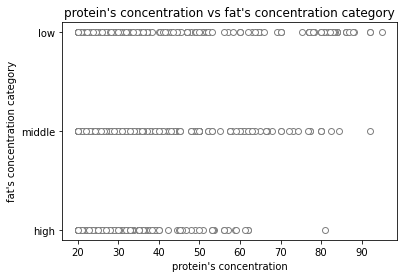

In [74]:
#analyse mutltivariée represenatée avec un nuage de points
x = dff['proteins_100g']
y = dff['rating_f']
plt.title('protein\'s concentration vs fat\'s concentration category')
plt.xlabel('protein\'s concentration')
plt.ylabel('fat\'s concentration category')
plt.plot(x, y, 'o', color='black', markerfacecolor='white',
         markeredgecolor='gray');

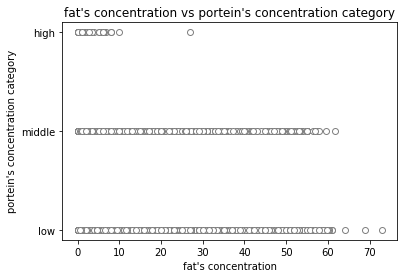

In [75]:
#analyse mutltivariée represenatée avec un nuage de points
x = dff['fat_100g']
y = dff['rating_p']
plt.title('fat\'s concentration vs portein\'s concentration category')
plt.xlabel('fat\'s concentration')
plt.ylabel('portein\'s concentration category')
plt.plot(x, y, 'o', color='black', markerfacecolor='white',
         markeredgecolor='gray')

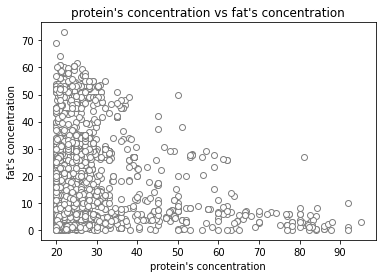

In [76]:
#analyse mutltivariée represenatée avec un nuage de points
x = dff['proteins_100g']
y = dff['fat_100g']
plt.title('protein\'s concentration vs fat\'s concentration')
plt.xlabel('protein\'s concentration')
plt.ylabel('fat\'s concentration')
plt.plot(x, y, 'o', color='black', markerfacecolor='white',
         markeredgecolor='gray')

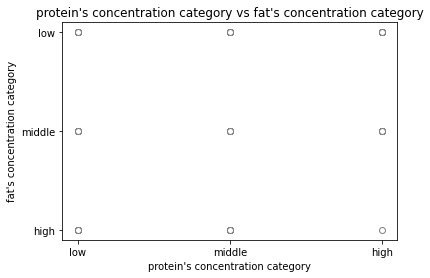

In [77]:
#analyse mutltivariée represenatée avec un nuage de points
x = dff['rating_p']
y = dff['rating_f']
plt.title('protein\'s concentration category vs fat\'s concentration category')
plt.xlabel('protein\'s concentration category')
plt.ylabel('fat\'s concentration category')
plt.plot(x, y, 'o', color='black', markerfacecolor='white',
         markeredgecolor='gray');

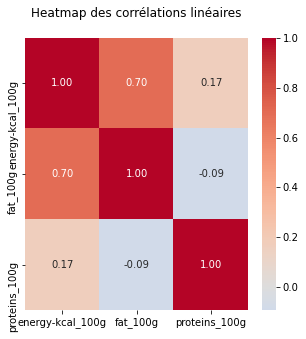

In [78]:
#heatmap des corrélations linéaires des variables quantitatives
corr = dff.corr()
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':10}, 
                center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [79]:
#Oneway ANOVA pour les categories de concentration de proteines
stats.f_oneway(dff['proteins_100g'][dff['rating_f'] == 'high'],
               dff['proteins_100g'][dff['rating_f'] == 'low'],
               dff['proteins_100g'][dff['rating_f'] == 'middle'])

F_onewayResult(statistic=43.00863391198827, pvalue=3.2616695017110025e-19)

In [80]:
#Oneway ANOVA pour les categories de concentration de matiere grasse
stats.f_oneway(dff['fat_100g'][dff['rating_p'] == 'high'],
               dff['fat_100g'][dff['rating_p'] == 'low'],
               dff['fat_100g'][dff['rating_p'] == 'middle'])

F_onewayResult(statistic=112.96988239065014, pvalue=1.7092447784097928e-48)

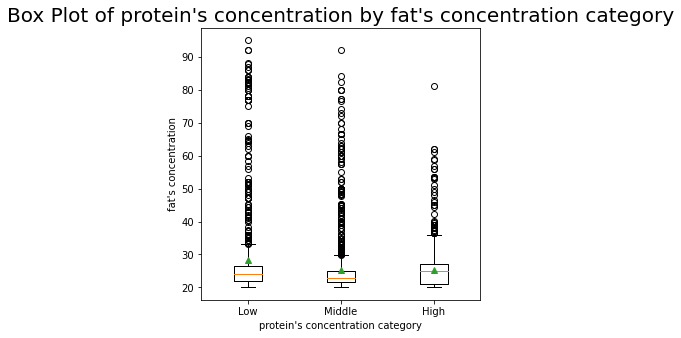

In [81]:
#boxplot de la distribution des concentration en proteines selon les categories de concentration de matiere grasse
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of protein's concentration by fat's concentration category", fontsize= 20)
ax.set

data = [dff['proteins_100g'][dff['rating_f'] == 'low'],
        dff['proteins_100g'][dff['rating_f'] == 'middle'],
        dff['proteins_100g'][dff['rating_f'] == 'high']]

ax.boxplot(data,
           labels= ['Low', 'Middle', 'High'],
           showmeans= True)

plt.xlabel("protein's concentration category")
plt.ylabel("fat's concentration")

plt.show()

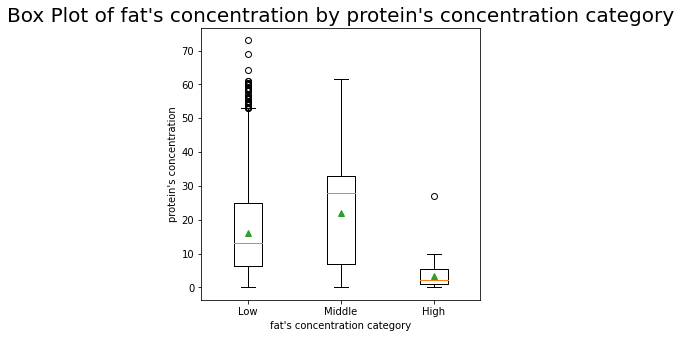

In [82]:
#boxplot de la distribution de la concentration en matiere grasse selon la categorie de concentration en proteines
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of fat's concentration by protein's concentration category", fontsize= 20)
ax.set

data = [dff['fat_100g'][dff['rating_p'] == 'low'],
        dff['fat_100g'][dff['rating_p'] == 'middle'],
        dff['fat_100g'][dff['rating_p'] == 'high']]

ax.boxplot(data,
           labels= ['Low', 'Middle', 'High'],
           showmeans= True)

plt.xlabel("fat's concentration category")
plt.ylabel("protein's concentration")

plt.show()

In [83]:
#test ANOVA des variables quantitatives
model = ols('proteins_100g ~ fat_100g', data=dff).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
fat_100g,2894.582820,1.0,35.516831,2.739533e-09
Residual,336671.977423,4131.0,NaN,NaN


In [84]:
#test ANOVA des variables quantitative vs qualitative
model = ols('proteins_100g ~ rating_f', data=dff).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
rating_f,6928.004773,2.0,43.008634,3.261670e-19
Residual,332638.555469,4130.0,NaN,NaN


In [85]:
#test ANOVA des variables quantitative vs qualitative
model = ols('fat_100g ~ rating_p', data=dff).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
rating_p,41628.069670,2.0,112.969882,1.709245e-48
Residual,760928.152256,4130.0,NaN,NaN


In [86]:
#categorisation des variables

rp.summary_cat(dff[["rating_p", "rating_f"]])

,Variable,Outcome,Count,Percent
0,rating_p,low,2635,63.76
1,,middle,1448,35.04
2,,high,50,1.21
3,rating_f,high,1723,41.69
4,,middle,1480,35.81
5,,low,930,22.50


In [87]:
#creation d'une crosstable categories de concentration en proteines VS categories de concentration en matiere grasse

crosstab = pd.crosstab(dff["rating_p"], dff["rating_f"])

 

crosstab

rating_f,high,low,middle
rating_p,,,
high,1,37,12
low,898,598,1139
middle,824,295,329


In [88]:
#Test du khi2

stats.chi2_contingency(crosstab)

#p<0.05>>>> On peut rejeter H0 et dire qu'il existe une association statistiquement significative entre les variables.

 

(309.49954365797765,
 9.670644931570018e-66,
 4,
 array([[  20.84442294,   11.25090733,   17.90466973],
        [1098.5010888 ,  592.92281636,  943.57609485],
        [ 603.65448827,  325.82627631,  518.51923542]]))

In [89]:
#test du khi2 avec specification de la force de la relation entre les variables donnée par la Cramer's V

crosstab, test_results, expected = rp.crosstab(dff["rating_p"], dff["rating_f"],

                                               test= "chi-square",

                                               expected_freqs= True,

                                               prop= "cell")

 

crosstab

rating_f                      
rating_f     high    low middle     All
rating_p                               
high         0.02   0.90   0.29    1.21
low         21.73  14.47  27.56   63.76
middle      19.94   7.14   7.96   35.04
All         41.69  22.50  35.81  100.00

In [90]:
#résultats du khi2 avec Cramer's V

test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,309.4995
1,p-value =,0.0000
2,Cramer's V =,0.1935


In [ ]:
#input de la modalité regime en matiere grasse pour ne laisser que les produits avec la fourchette de concentration en matiere grasse souhaitée
print('entrez le regime de prise de masse grasse entre: perte de graisse, consommation normale, prise de graisse')
regime = input()

#verifier que le input soit correct
while regime not in('perte de graisse', 'consommation normale', 'prise de graisse'):
    print('erreur: choisissez entre: perte de graisse, consommation normale, prise de graisse')
    regime = input()
 
#recategorisation des concentration en matiere grasse en fonction des objects physiques du praticien
if regime == 'perte de graisse':
    dfff = dff.loc[dff['fat_100g'] <= 5]
elif regime == 'prise de graisse':
    dfff = dff.loc[dff['fat_100g'] > 20]
else:
    dfff = dff.loc[(dff['fat_100g'] <= 20) & (dff['fat_100g'] >5)]
#verifier et donner quelques lignes pour faciliter le copier coller des produits pour l'application ci-dessous                   
dfff.head()
 


entrez le regime de prise de masse grasse entre: perte de graisse, consommation normale, prise de graisse
